In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

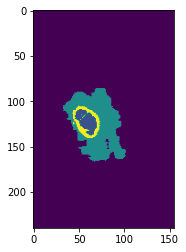

In [2]:
img = cv2.imread('../data/Outdir/75.png', 0)
plt.imshow(img)

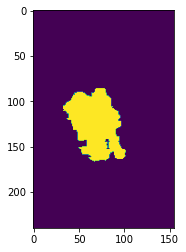

In [3]:
img = np.where(img > 0, 64, img)
plt.imshow(img)

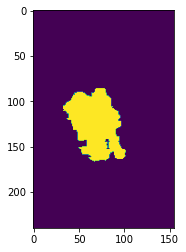

In [4]:
img_bw = img > 63;
img_bw = 255 * img_bw.astype('uint8')
plt.imshow(img_bw)

In [5]:
contours, _ = cv2.findContours(img_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [6]:
out = img.copy()

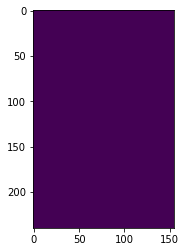

In [7]:
ref = np.zeros_like(img_bw)
plt.imshow(ref)

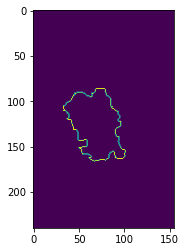

In [8]:
cv2.drawContours(ref, contours, 0, 255, 1)
plt.imshow(ref)

In [9]:
# M = cv2.moments(contours[0])
M = cv2.moments(ref)

centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

print(centroid_x)
print(centroid_y)

68
128


In [10]:
width = img.shape[1]
height = img.shape[0]

print(width)
print(height)

155
240


In [11]:
N = 180
distances = []
import math

In [12]:
for i in np.arange(0, N, .2):
    # Step #6a
    tmp = np.zeros_like(img_bw)

    # Step #6b
    theta = i*(360/N)
    theta *= np.pi/180.0

    # Step #6c
    cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

    # Step #6d
    (row, col) = np.nonzero(np.logical_and(tmp, ref))

    print(row)
    print(col)
    # Step #6e
    cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
    
    distance = math.sqrt(
        ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
    )
    distances.append(distance)


[125 126 127 128 128 129 129 130 131]
[96 96 96 94 95 92 93 91 90]
[125 126 127 128 128 129 129 130 131]
[96 96 96 94 95 92 93 91 90]
[124 125 126 127 128 128 129 129 130]
[96 96 96 96 94 95 92 93 91]
[124 125 126 127 128 128 129 129 130]
[96 96 96 96 94 95 92 93 91]
[124 125 126 127 128 128 129 129 130]
[96 96 96 96 94 95 92 93 91]
[123 124 125 126 127 128 128 129 129 130]
[96 96 96 96 96 94 95 92 93 91]
[123 124 125 126 127 128 128 129 129]
[96 96 96 96 96 94 95 92 93]
[123 124 125 126 127 128 128 129 129]
[96 96 96 96 96 94 95 92 93]
[122 123 124 125 126 127 128 128 129 129]
[96 96 96 96 96 96 94 95 92 93]
[122 122 122 123 124 125 126 127 128 128]
[94 95 96 96 96 96 96 96 94 95]
[122 122 122 123 124 125 126 127 128 128]
[94 95 96 96 96 96 96 96 94 95]
[122 122 122 123 124 125 126 127 128 128]
[94 95 96 96 96 96 96 96 94 95]
[122 122 122 123 124 125 126 127]
[94 95 96 96 96 96 96 96]
[121 122 122 122 123 124 125 126 127]
[93 94 95 96 96 96 96 96 96]
[121 122 122 122 123 124 125 126 1

[90 90 90 90 90 91 91 92 93]
[50 51 52 53 54 55 56 57 58]
[90 90 90 90 90 91 91 92 93]
[50 51 52 53 54 55 56 57 58]
[90 90 90 90 90 91 91 92]
[50 51 52 53 54 55 56 57]
[90 90 90 90 90 90 91 91 92]
[49 50 51 52 53 54 55 56 57]
[90 90 90 90 90 90 91 91]
[49 50 51 52 53 54 55 56]
[90 90 90 90 90 90 91 91]
[49 50 51 52 53 54 55 56]
[90 90 90 90 90 90 91 91]
[49 50 51 52 53 54 55 56]
[90 90 90 90 90 90 91]
[49 50 51 52 53 54 55]
[90 90 90 90 90 90 90 91]
[48 49 50 51 52 53 54 55]
[90 90 90 90 90 90 90 91]
[48 49 50 51 52 53 54 55]
[90 90 90 90 90 90 90 91]
[48 49 50 51 52 53 54 55]
[90 90 90 90 90 90 90]
[48 49 50 51 52 53 54]
[90 90 90 90 90 90 90]
[48 49 50 51 52 53 54]
[90 90 90 90 90 90 91]
[48 49 50 51 52 53 47]
[90 90 90 90 90 90 91]
[48 49 50 51 52 53 47]
[90 90 90 90 90 90 91]
[48 49 50 51 52 53 47]
[90 90 90 90 90 90 91]
[48 49 50 51 52 53 47]
[90 90 90 90 90 90 91 91]
[48 49 50 51 52 53 46 47]
[90 90 90 90 90 91 91]
[48 49 50 51 52 46 47]
[90 90 90 90 90 91 91 92]
[48 49 50 51 52 

[157 158 159 160 161 162 163 163]
[84 84 83 83 83 83 81 82]
[157 158 159 160 161 162 163 163]
[84 84 83 83 83 83 81 82]
[157 158 159 160 161 162 163 163]
[84 84 83 83 83 83 81 82]
[157 158 159 160 161 162 163 163]
[84 84 83 83 83 83 81 82]
[157 158 159 160 161 162 163 163]
[84 84 83 83 83 83 81 82]
[156 157 158 159 160 161 162 163]
[85 84 84 83 83 83 83 82]
[156 157 158 159 160 161 162 163]
[85 84 84 83 83 83 83 82]
[156 157 158 159 160 161 162 163]
[85 84 84 83 83 83 83 82]
[156 157 158 159 160 161 162 163]
[85 84 84 83 83 83 83 82]
[156 157 158 159 160 161 162]
[85 84 84 83 83 83 83]
[156 156 157 158 159 160 161 162]
[85 86 84 84 83 83 83 83]
[156 156 157 158 159 160 161 162]
[85 86 84 84 83 83 83 83]
[156 156 157 158 159 160 161 162]
[85 86 84 84 83 83 83 83]
[156 156 157 158 159 160 161 162 162]
[85 86 84 84 83 83 83 83 90]
[156 156 157 158 159 160 161 162]
[85 86 84 84 83 83 83 90]
[156 156 157 158 159 160 161 161 162]
[85 86 84 84 83 83 83 90 90]
[156 156 157 158 159 159 160 161 

[129 129 130 131 132 133 134 135]
[92 93 91 90 90 90 90 90]
[129 129 130 131 132 133 134 135]
[92 93 91 90 90 90 90 90]
[129 129 130 131 132 133 134 135]
[92 93 91 90 90 90 90 90]
[129 129 130 131 132 133 134]
[92 93 91 90 90 90 90]
[129 129 130 131 132 133 134]
[92 93 91 90 90 90 90]
[128 129 129 130 131 132 133 134]
[94 92 93 91 90 90 90 90]
[128 128 129 129 130 131 132 133 134]
[94 95 92 93 91 90 90 90 90]
[128 128 129 129 130 131 132 133]
[94 95 92 93 91 90 90 90]
[128 128 129 129 130 131 132 133]
[94 95 92 93 91 90 90 90]
[127 128 128 129 129 130 131 132 133]
[96 94 95 92 93 91 90 90 90]
[127 128 128 129 129 130 131 132 133]
[96 94 95 92 93 91 90 90 90]
[127 128 128 129 129 130 131 132]
[96 94 95 92 93 91 90 90]
[126 127 128 128 129 129 130 131 132]
[96 96 94 95 92 93 91 90 90]
[126 127 128 128 129 129 130 131 132]
[96 96 94 95 92 93 91 90 90]
[126 127 128 128 129 129 130 131 132]
[96 96 94 95 92 93 91 90 90]
[126 127 128 128 129 129 130 131]
[96 96 94 95 92 93 91 90]
[125 126 127

In [13]:
distances

[28.160255680657446,
 28.160255680657446,
 28.284271247461902,
 28.284271247461902,
 28.284271247461902,
 28.442925306655784,
 28.442925306655784,
 28.442925306655784,
 28.635642126552707,
 26.68332812825267,
 26.68332812825267,
 26.68332812825267,
 26.68332812825267,
 25.96150997149434,
 25.96150997149434,
 25.96150997149434,
 26.248809496813376,
 26.248809496813376,
 26.248809496813376,
 27.51363298439521,
 27.51363298439521,
 28.792360097775937,
 28.792360097775937,
 28.792360097775937,
 28.792360097775937,
 29.154759474226502,
 29.154759474226502,
 29.154759474226502,
 29.546573405388315,
 29.546573405388315,
 29.546573405388315,
 29.546573405388315,
 29.546573405388315,
 29.068883707497267,
 29.068883707497267,
 29.068883707497267,
 29.068883707497267,
 28.653097563788805,
 28.653097563788805,
 28.653097563788805,
 29.154759474226502,
 29.154759474226502,
 29.154759474226502,
 29.154759474226502,
 29.68164415931166,
 29.68164415931166,
 29.68164415931166,
 30.23243291566195,
 29.4

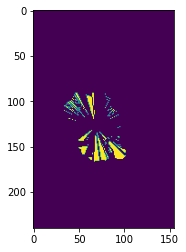

In [14]:
# Show the image
# Step #7
plt.imshow(out)
# cv2.imshow('Output', out)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

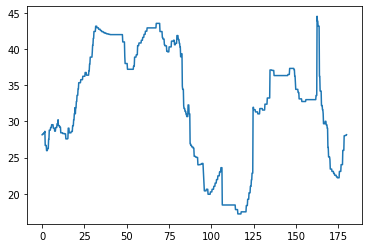

In [15]:
plt.plot(np.arange(0, N, .2), distances)